### Курсовой проект

In [831]:
import numpy as np
import pandas as pd

### Загрузка датасета

https://www.kaggle.com/datasets/alexeyleshchenko/moscow-apartment-listings

In [832]:
moscow = pd.read_csv(r"C:\Users\Hozyain\moscow_apartment_listings.csv")

### Оригинал описания датасета

Moscow apartment listings w/prices

Price - Listed price in Russian roubles

repair - Condition: 1 - worst, 4 - best

year_built_empty - "1" if we know the year of construction

house_age - 2020 - the year of construction

closest_subway - id of the closest subway station

dist_to_subway - Distance to the closest subway in meters

sg - Subway grade: 0 - Underground 1 - Urban rail (CMK) 2 - Suburban rail (MKD) 3 - Monorail (light rail)

lat - Latitude

lon - Longitude

subway_dist_to_center - Distance of the closest subway to the city center in meters

h3 - Uber's H3 geospatial code

agent_offers - Number of listings by the same agent

subway_offers - Number of listings in the vicinity of the same subway station

address_offers - Number of listings at the same address

rooms - Number of rooms

footage - Total footage in square meters

floor - The floor on which the apartment is situated

max_floor - Total floors in the building

first_floor - "1" if the apartment is on the first floor

last_floor - "1" if the apartment is on the top floor

AO - District (административный округ)

hm - Material from which the building is built

### Перевод описания датасета

### Информация о здании, расположенном в 29 метрах соответствует действительности - Краснодарская улица, 48 находится по соседству с м. Люблино

### Ознакомление с содержимым датасета

In [833]:
moscow.head()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,...,5,1.0,1,39.4,11,12,0,0,UAO,panel
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,...,9,1.0,1,35.6,2,9,0,0,UAO,panel
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,...,9,2.0,2,53.0,5,12,0,0,UAO,panel
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,...,5,1.0,2,44.1,8,9,0,0,UAO,panel
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,...,5,1.0,2,44.2,6,9,0,0,UAO,panel


In [834]:
moscow.shape

(12181, 22)

In [835]:
moscow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  12181 non-null  int64  
 1   repair                 12181 non-null  int64  
 2   year_built_empty       12181 non-null  int64  
 3   house_age              12181 non-null  int64  
 4   closest_subway         12181 non-null  int64  
 5   dist_to_subway         12181 non-null  int64  
 6   sg                     12181 non-null  float64
 7   lat                    12181 non-null  float64
 8   lon                    12181 non-null  float64
 9   subway_dist_to_center  12181 non-null  int64  
 10  h3                     12181 non-null  object 
 11  agent_offers           12181 non-null  int64  
 12  subway_offers          12181 non-null  int64  
 13  address_offers         12181 non-null  float64
 14  rooms                  12181 non-null  int64  
 15  fo

### Изменение типа переменных в датасете

In [836]:
moscow['repair'] = moscow['repair'].astype(str)
moscow['year_built_empty'] = moscow['year_built_empty'].astype(bool)
moscow['closest_subway'] = moscow['closest_subway'].astype(str)
moscow['sg'] = moscow['sg'].astype(str)
moscow['lat'] = moscow['lat'].astype(str)
moscow['lon'] = moscow['lon'].astype(str)
moscow['first_floor'] = moscow['first_floor'].astype(bool)
moscow['last_floor'] = moscow['last_floor'].astype(bool)

In [837]:
moscow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  12181 non-null  int64  
 1   repair                 12181 non-null  object 
 2   year_built_empty       12181 non-null  bool   
 3   house_age              12181 non-null  int64  
 4   closest_subway         12181 non-null  object 
 5   dist_to_subway         12181 non-null  int64  
 6   sg                     12181 non-null  object 
 7   lat                    12181 non-null  object 
 8   lon                    12181 non-null  object 
 9   subway_dist_to_center  12181 non-null  int64  
 10  h3                     12181 non-null  object 
 11  agent_offers           12181 non-null  int64  
 12  subway_offers          12181 non-null  int64  
 13  address_offers         12181 non-null  float64
 14  rooms                  12181 non-null  int64  
 15  fo

### Задание целевого параметра модели

In [838]:
y = moscow.price
y.head()

0     8000000
1     7200000
2    10300000
3     8500000
4     9000000
Name: price, dtype: int64

### Задание массива данных для построения модели

In [839]:
X = moscow.drop(columns='price')
X.head()

,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,h3,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,3,False,42,59,960,0.0,55.60900899999999,37.734632,17166,861181b6fffffff,...,5,1.0,1,39.4,11,12,False,False,UAO,panel
1,2,False,43,59,802,0.0,55.60876,37.741936,17166,861181b4fffffff,...,9,1.0,1,35.6,2,9,False,False,UAO,panel
2,2,False,43,59,638,0.0,55.6102066,37.7424953,17166,861181b4fffffff,...,9,2.0,2,53.0,5,12,False,False,UAO,panel
3,2,False,43,59,929,0.0,55.6240169,37.7403735,17166,861181b6fffffff,...,5,1.0,2,44.1,8,9,False,False,UAO,panel
4,2,False,43,59,785,0.0,55.6091073,37.74043,17166,861181b4fffffff,...,5,1.0,2,44.2,6,9,False,False,UAO,panel


In [840]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   repair                 12181 non-null  object 
 1   year_built_empty       12181 non-null  bool   
 2   house_age              12181 non-null  int64  
 3   closest_subway         12181 non-null  object 
 4   dist_to_subway         12181 non-null  int64  
 5   sg                     12181 non-null  object 
 6   lat                    12181 non-null  object 
 7   lon                    12181 non-null  object 
 8   subway_dist_to_center  12181 non-null  int64  
 9   h3                     12181 non-null  object 
 10  agent_offers           12181 non-null  int64  
 11  subway_offers          12181 non-null  int64  
 12  address_offers         12181 non-null  float64
 13  rooms                  12181 non-null  int64  
 14  footage                12181 non-null  float64
 15  fl

### Загрузка шаблона с модулями

In [841]:
import numpy as np
import pandas as pd
import random
import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [842]:
import warnings
warnings.filterwarnings('ignore')

In [843]:
matplotlib.rcParams.update({'font.size': 14})

### Создание функции вывода результатов работы модели в виде графиков

In [844]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

### Разбиение датасета на тренировочный и тестовый

In [845]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [846]:
X_train.shape

(9744, 21)

In [847]:
X_test.shape

(2437, 21)

In [848]:
y_train.shape

(9744,)

In [849]:
y_test.shape

(2437,)

In [850]:
X_test.tail(5)

,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,h3,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
3447,2,False,58,139,1078,0.0,55.67466700000001,37.487713,10917,8611aa7b7ffffff,...,7,1.0,2,46.0,1,5,True,False,ZAO,panel
5042,3,False,43,16,1794,0.0,55.859302,37.504942,14800,8611aa707ffffff,...,8,1.0,2,58.0,2,17,False,False,SAO,panel
467,2,False,46,158,882,1.0,55.763933,37.736195,8355,8611aa617ffffff,...,4,1.0,1,37.5,5,14,False,False,VAO,brick
6380,2,False,50,122,1230,0.0,55.790825,37.47907,8949,8611aa717ffffff,...,6,1.0,1,34.0,8,9,False,False,SZAO,brick
8066,4,False,51,151,1026,0.0,55.861105,37.64024600000001,11734,8611aa627ffffff,...,9,1.0,1,36.0,12,12,False,True,SVAO,block


### Анализ данных

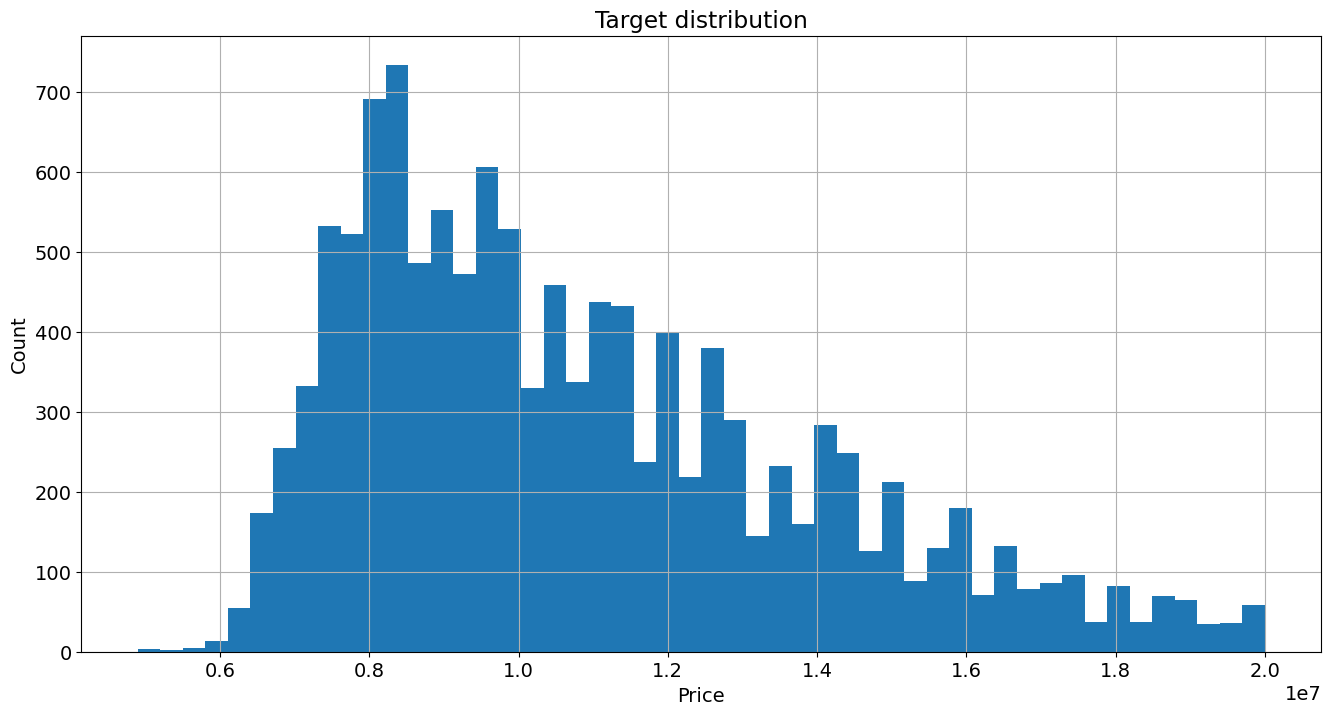

In [851]:
plt.figure(figsize = (16, 8))

moscow['price'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [852]:
X_train.describe()

,house_age,dist_to_subway,subway_dist_to_center,agent_offers,subway_offers,address_offers,rooms,footage,floor,max_floor
count,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000
mean,36.159483,930.863608,11970.867200,25.111966,10.132594,1.283251,1.598009,46.077247,6.899528,13.520731
std,21.348485,533.726228,4718.323703,61.231197,7.058375,0.724509,0.490325,10.535780,5.344545,6.462310
min,0.000000,11.000000,1402.000000,0.000000,1.000000,1.000000,1.000000,30.100000,1.000000,2.000000
25%,16.000000,550.000000,8635.000000,1.000000,5.000000,1.000000,1.000000,38.000000,3.000000,9.000000
50%,42.000000,819.000000,12430.000000,1.000000,8.000000,1.000000,2.000000,44.400000,5.000000,12.000000
75%,53.000000,1183.250000,14840.000000,11.000000,13.000000,1.000000,2.000000,53.300000,10.000000,17.000000
max,130.000000,2988.000000,24636.000000,292.000000,40.000000,9.000000,2.000000,89.900000,38.000000,39.000000


In [853]:
y_train.describe()

count    9.744000e+03
mean     1.085110e+07
std      3.032246e+06
min      4.900000e+06
25%      8.478750e+06
50%      1.020000e+07
75%      1.265000e+07
max      2.000000e+07
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'house_age'}>,
        <AxesSubplot:title={'center':'dist_to_subway'}>,
        <AxesSubplot:title={'center':'subway_dist_to_center'}>],
       [<AxesSubplot:title={'center':'agent_offers'}>,
        <AxesSubplot:title={'center':'subway_offers'}>,
        <AxesSubplot:title={'center':'address_offers'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'footage'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'max_floor'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

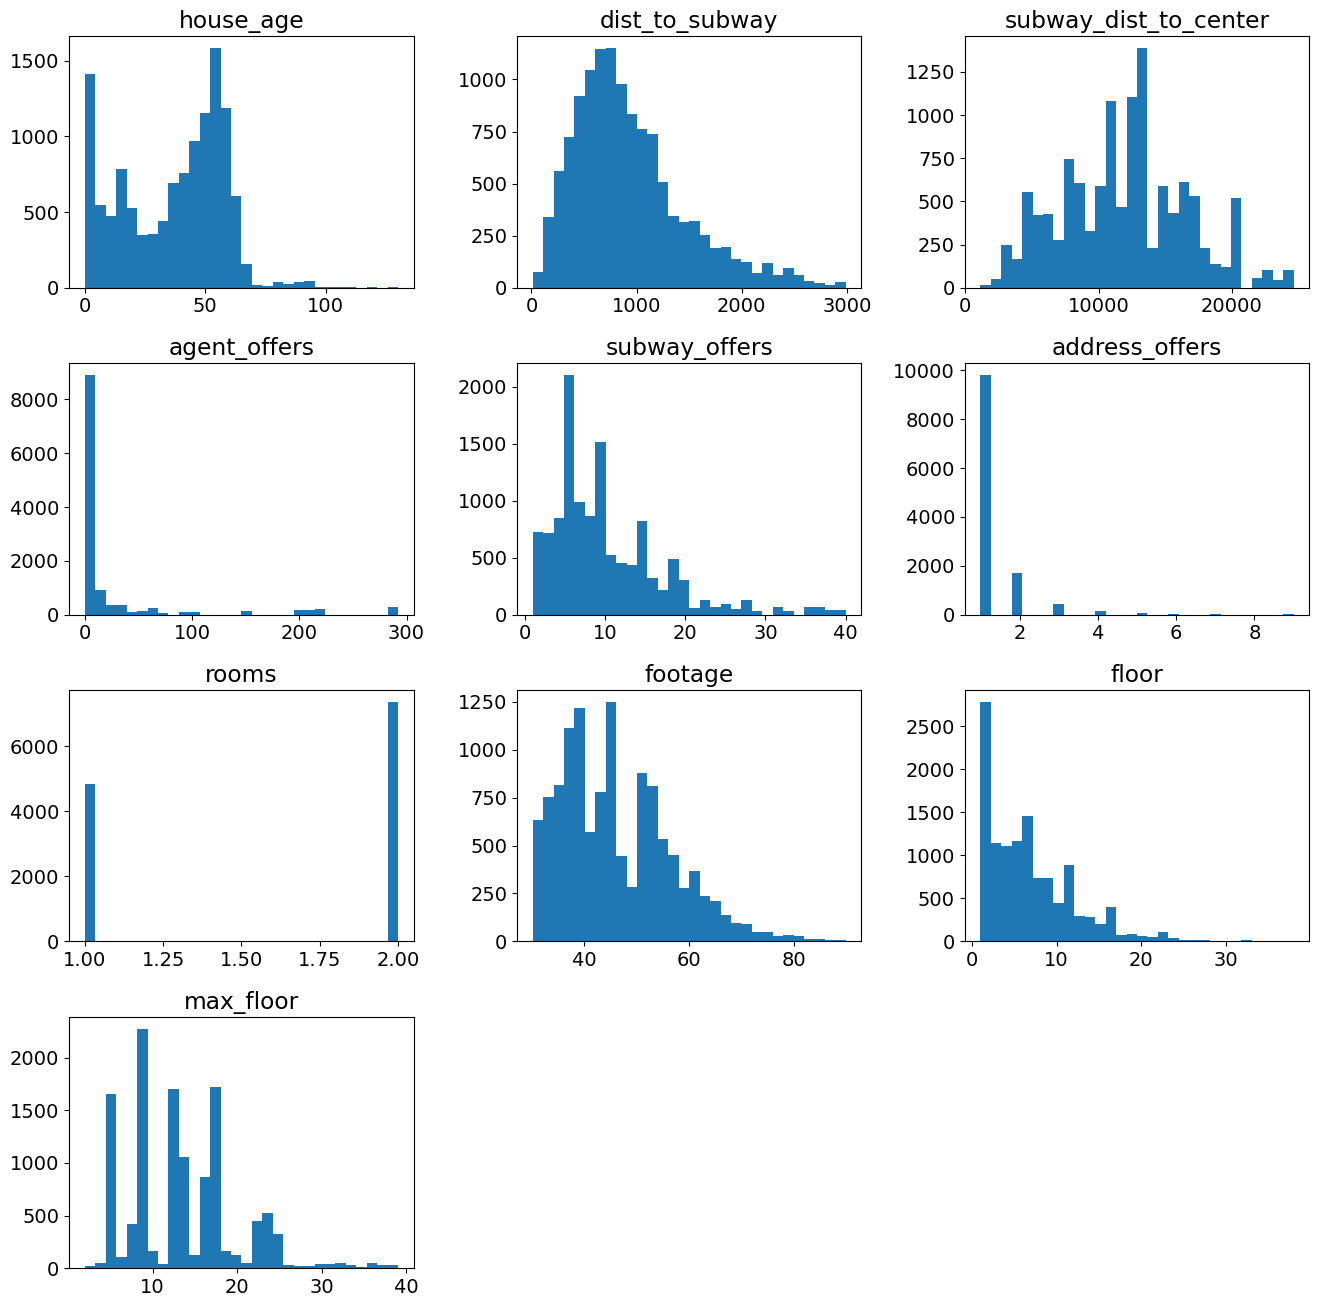

In [854]:
X.hist(figsize=(16,16), bins=30, grid=False)

### Номинативные переменные

In [855]:
moscow.select_dtypes(include='object').columns.tolist()

['repair', 'closest_subway', 'sg', 'lat', 'lon', 'h3', 'AO', 'hm']

In [856]:
moscow['repair'].value_counts()

2    6280
3    3320
1    1742
4     839
Name: repair, dtype: int64

In [857]:
moscow['closest_subway'].value_counts()

109    353
81     219
93     218
195    214
153    212
      ... 
162      4
121      3
146      2
142      2
67       1
Name: closest_subway, Length: 200, dtype: int64

In [858]:
moscow['sg'].value_counts()

0.0    10448
2.0     1075
1.0      584
3.0       74
Name: sg, dtype: int64

In [859]:
moscow['lat'].value_counts()

55.9415774           55
55.774745            39
55.70822800000001    34
55.75147679999999    29
55.697453            28
                     ..
55.850822             1
55.8435076            1
55.85024179999999     1
55.8467267            1
55.7591376            1
Name: lat, Length: 6476, dtype: int64

In [860]:
moscow['lon'].value_counts()

37.5315043           55
37.548609            39
37.9427739           34
37.6993277           29
37.633976            28
                     ..
37.933564             1
37.93540460000001     1
37.9195133            1
37.564248             1
37.6422918            1
Name: lon, Length: 6462, dtype: int64

In [861]:
df = moscow[moscow['h3'] == '8611aa40fffffff']
df

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
12166,7500000,2,False,41,146,2799,0.0,55.612263,37.306055,22177,...,1,1.0,2,45.9,2,12,False,False,ZAO,panel


In [862]:
moscow['AO'].value_counts()

UVAO    2053
ZAO     1594
UAO     1496
UZAO    1453
SAO     1422
SVAO    1388
VAO     1362
SZAO     760
CAO      653
Name: AO, dtype: int64

In [863]:
moscow['hm'].value_counts()

panel       5731
brick       2483
monolith    2378
block       1589
Name: hm, dtype: int64

### Обработка выбросов

In [864]:
moscow['house_age'].value_counts()

1      392
0      369
58     345
54     333
52     324
      ... 
72       1
76       1
125      1
115      1
110      1
Name: house_age, Length: 106, dtype: int64

In [865]:
moscow['house_age'].describe()

count    12181.000000
mean        36.360644
std         21.406406
min          0.000000
25%         17.000000
50%         42.000000
75%         54.000000
max        130.000000
Name: house_age, dtype: float64

In [866]:
moscow['house_age'].value_counts()

1      392
0      369
58     345
54     333
52     324
      ... 
72       1
76       1
125      1
115      1
110      1
Name: house_age, Length: 106, dtype: int64

moscow['house_age'].value_counts().to_csv("results.csv", index=True)

In [867]:
moscow['dist_to_subway'].value_counts()

758     72
1093    46
195     40
422     39
1104    37
        ..
2675     1
2632     1
2501     1
2296     1
2799     1
Name: dist_to_subway, Length: 1972, dtype: int64

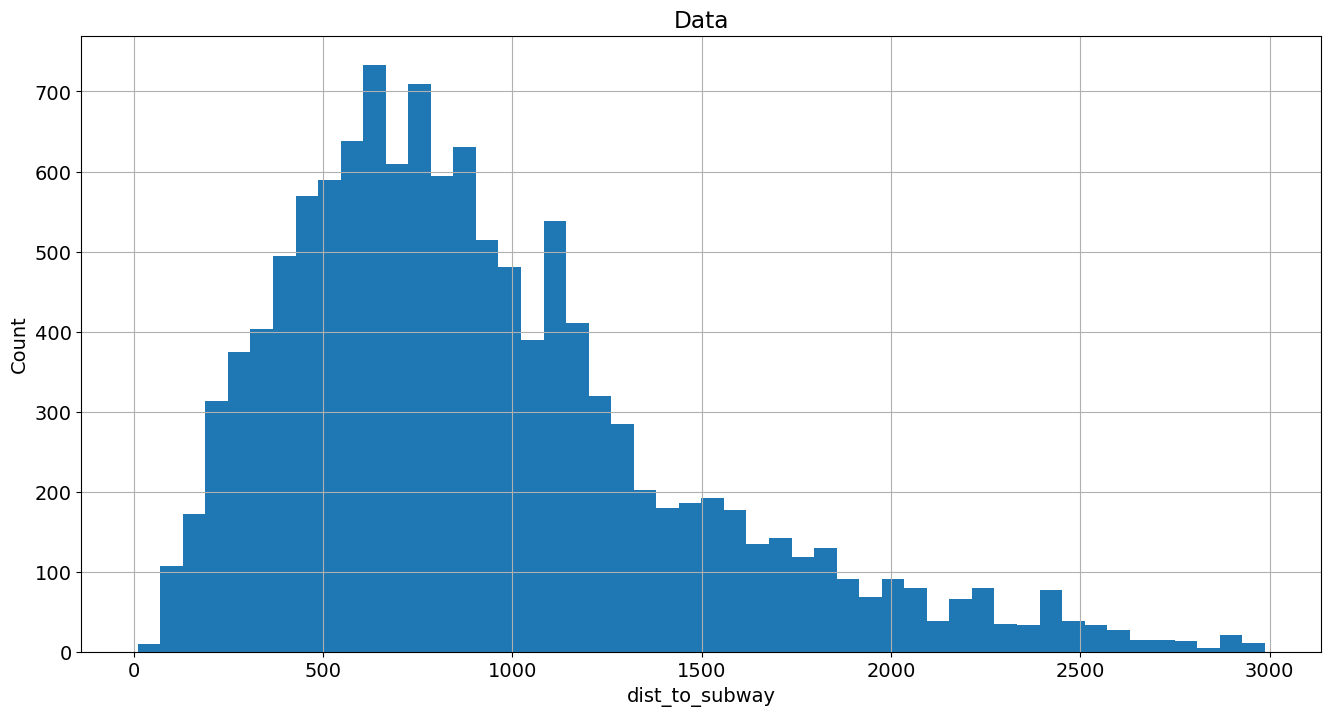

In [868]:
plt.figure(figsize = (16, 8))

moscow['dist_to_subway'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('dist_to_subway')

plt.title('Data')
plt.show()

In [869]:
moscow['dist_to_subway'].describe()

count    12181.000000
mean       928.353748
std        532.443508
min         11.000000
25%        548.000000
50%        820.000000
75%       1177.000000
max       2988.000000
Name: dist_to_subway, dtype: float64

<AxesSubplot:xlabel='dist_to_subway'>

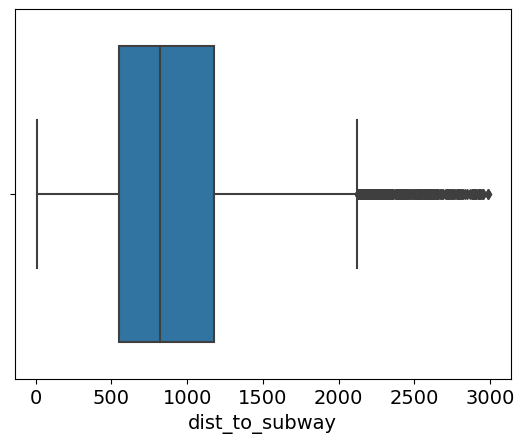

In [870]:
sns.boxplot(moscow.dist_to_subway)

In [871]:
df = moscow[moscow['dist_to_subway'] <= 50]
df

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
255,9600000,2,False,34,81,33,0.0,55.70523100000001,37.7630423,10612,...,14,1.0,1,44.0,11,16,False,False,UVAO,brick
6205,9000000,2,False,16,93,29,0.0,55.67654399999999,37.761177,12430,...,17,1.0,1,52.0,5,8,False,False,UVAO,panel
6489,12900000,2,False,82,55,45,0.0,55.716392000000006,37.676214,5499,...,4,1.0,2,49.6,3,8,False,False,UVAO,brick
9574,12300000,2,False,58,3,48,0.0,55.808193,37.63839,6348,...,16,1.0,2,39.0,7,12,False,False,SVAO,brick
10844,10990000,3,False,32,24,11,0.0,55.647066,37.370239,19330,...,2,1.0,2,54.0,8,17,False,False,ZAO,panel
11356,11500000,2,False,69,68,46,0.0,55.70621800000001,37.684712,6738,...,2,1.0,2,53.0,5,5,False,True,UVAO,brick


#### Нахождение здания в 11 метрах от входа в Метрополитен в ЗАО вызывает сомнения

#### По данным координатам находится здание по адресу: 2-я Рейсовая улица, 25, посёлок Внуково: близжайшее метро - Рассказовка в 2900 метрах 

#### Информация о здании, расположенном в 33 метрах соответствует действительности - Волгоградский проспект, 78 находится по соседству с м. Кузьминки

#### Информация о здании, расположенном в 29 метрах соответствует действительности - Краснодарская улица, 48 находится по соседству с м. Люблино

In [872]:
moscow.loc[moscow['dist_to_subway'] == 11, 'dist_to_subway'] = 2900

In [873]:
df = moscow[moscow['dist_to_subway'] >= 2900]
df

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
374,10000000,2,False,57,194,2935,0.0,55.78406,37.4501,11455,...,7,1.0,1,32.0,5,5,False,True,SZAO,panel
408,8500000,2,False,57,194,2935,0.0,55.78406,37.4501,11455,...,7,1.0,2,45.2,1,5,True,False,SZAO,panel
416,8500000,2,False,57,194,2935,0.0,55.78406,37.4501,11455,...,9,1.0,2,45.2,1,5,True,False,SZAO,panel
940,8650000,2,False,50,98,2917,0.0,55.883176,37.707503,15384,...,14,1.0,2,45.6,4,14,False,False,SVAO,panel
1007,7750000,2,False,50,98,2917,0.0,55.883176,37.707503,15384,...,29,1.0,1,39.0,14,14,False,True,SVAO,panel
1927,8500000,1,False,42,129,2988,0.0,55.77836,37.83774,12418,...,18,1.0,2,50.3,16,17,False,False,VAO,block
2667,7997000,2,False,50,9,2929,0.0,55.88044,37.707916,13519,...,37,1.0,2,45.0,6,9,False,False,SVAO,panel
2722,9000000,2,False,50,9,2929,0.0,55.88044,37.707916,13519,...,20,1.0,2,44.4,6,9,False,False,SVAO,panel
5350,7000000,2,False,37,134,2986,2.0,55.585304,37.66786,16633,...,13,1.0,1,39.0,6,17,False,False,UAO,block
5428,7200000,2,False,16,134,2934,2.0,55.588627,37.67126500000001,16633,...,10,1.0,1,43.3,13,16,False,False,UAO,panel


#### Информация о здании, расположенном в 2900 метрах не соответствует действительности - Боровское шоссе, 21 находится в 70 метрах от метро Боровское шоссе (открыта в 2018 г)

In [874]:
moscow.loc[[10844], 'dist_to_subway'] = 70

In [875]:
moscow.iloc[10844]

price                           10990000
repair                                 3
year_built_empty                   False
house_age                             32
closest_subway                        24
dist_to_subway                        70
sg                                   0.0
lat                            55.647066
lon                            37.370239
subway_dist_to_center              19330
h3                       8611aa457ffffff
agent_offers                          54
subway_offers                          2
address_offers                       1.0
rooms                                  2
footage                             54.0
floor                                  8
max_floor                             17
first_floor                        False
last_floor                         False
AO                                   ZAO
hm                                 panel
Name: 10844, dtype: object

#### Информация о здании, расположенном в 2988 метрах соответствует действительности - Малый Купавенский проезд, 3 находится примерно в 3 км от метро Новогиреево

#### Информация о здании, расположенном в 2927 метрах соответствует действительности - Живописная улица, 6к1 находится примерно в 3 км от метро Октябрьское поле. Станция метро Народное ополчение находится ближе (на расстоянии около 1900 метров), однако на момент создания датасета еще не была открыта

#### Выборочная проверка данных показала, что дальнейшее выявление ошибочных данных вероятно не будет иметь достаточного для практических целей результатов

In [876]:
moscow['dist_to_subway'].describe()

count    12181.000000
mean       928.358591
std        532.435431
min         29.000000
25%        548.000000
50%        820.000000
75%       1177.000000
max       2988.000000
Name: dist_to_subway, dtype: float64

In [877]:
moscow['subway_dist_to_center'].describe()

count    12181.000000
mean     11938.048026
std       4711.729983
min       1133.000000
25%       8635.000000
50%      12418.000000
75%      14800.000000
max      24636.000000
Name: subway_dist_to_center, dtype: float64

<AxesSubplot:xlabel='subway_dist_to_center'>

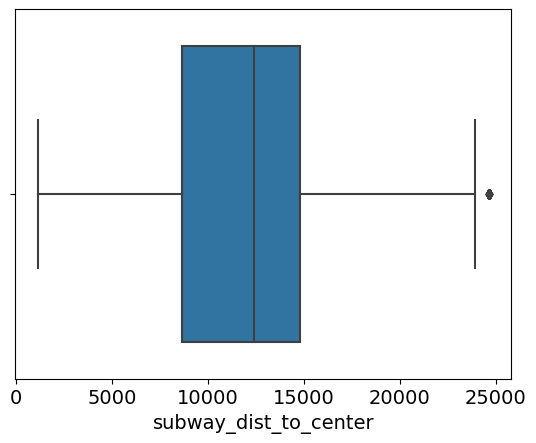

In [878]:
sns.boxplot(moscow.subway_dist_to_center)

In [879]:
df = moscow[moscow['subway_dist_to_center'] >= 24000]
df

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
6242,10900000,2,False,20,30,553,0.0,55.54276700000001,37.518282,24636,...,9,3.0,2,50.1,5,12,False,False,UZAO,panel
6243,11300000,2,False,23,30,957,0.0,55.5312497,37.525401,24636,...,9,1.0,2,77.0,1,5,True,False,UZAO,panel
6244,8690000,3,False,20,30,556,0.0,55.53526899999999,37.52333,24636,...,9,1.0,1,36.0,1,9,True,False,UZAO,panel
6245,11400000,3,False,16,30,388,0.0,55.5391845,37.5101102,24636,...,9,1.0,2,51.0,15,17,False,False,UZAO,panel
6246,8600000,3,False,4,30,1156,0.0,55.5276313,37.5140688,24636,...,3,2.0,2,46.5,13,17,False,False,UZAO,panel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6304,10990000,3,False,20,30,553,0.0,55.54276700000001,37.518282,24636,...,4,1.0,2,50.0,5,12,False,False,UZAO,panel
6305,10900000,2,False,20,30,553,0.0,55.54276700000001,37.518282,24636,...,7,1.0,2,50.0,5,12,False,False,UZAO,panel
6306,9300000,2,False,18,30,831,0.0,55.533797,37.526851,24636,...,6,2.0,1,45.0,12,13,False,False,UZAO,brick
6307,8500000,2,False,13,30,898,0.0,55.535553,37.502274,24636,...,9,1.0,1,38.0,2,22,False,False,UZAO,panel


#### Информация подтверждается

In [880]:
moscow['rooms'].value_counts()

2    7357
1    4824
Name: rooms, dtype: int64

In [881]:
moscow['floor'].value_counts()

2     1508
1     1275
5     1170
3     1149
4     1113
9      742
8      739
6      739
7      715
12     466
10     442
11     427
13     291
14     283
15     204
16     202
17     199
19      83
18      74
22      63
20      61
21      52
23      52
24      35
25      17
26      14
27      10
29      10
28       8
33       8
32       7
30       7
31       6
35       4
34       3
36       1
38       1
37       1
Name: floor, dtype: int64

In [882]:
moscow['max_floor'].value_counts()

9     2273
5     1651
12    1618
17    1588
14    1054
16     863
22     448
8      336
25     327
24     306
23     216
19     164
10     162
18     133
15     126
20     123
6      109
7       85
13      81
21      52
36      50
4       49
32      46
11      45
30      39
31      38
37      33
26      30
33      27
27      23
39      22
3       16
38      13
35      10
28      10
29       7
34       5
2        3
Name: max_floor, dtype: int64

moscow['max_floor'].value_counts().to_csv("results.csv", index=True)

<AxesSubplot:xlabel='max_floor'>

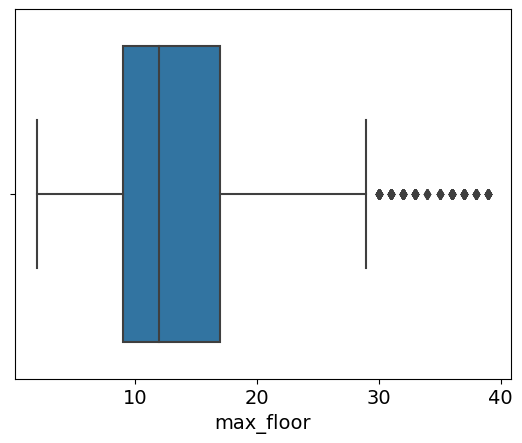

In [883]:
sns.boxplot(moscow.max_floor)

Значения вполне возможные

Проверим не превышает-ли указанный этаж кварьтры этажность здания

In [884]:
(moscow['floor'] > moscow['max_floor']).sum()

0

### Обработка пропусков

In [885]:
moscow.isna().sum()

price                    0
repair                   0
year_built_empty         0
house_age                0
closest_subway           0
dist_to_subway           0
sg                       0
lat                      0
lon                      0
subway_dist_to_center    0
h3                       0
agent_offers             0
subway_offers            0
address_offers           0
rooms                    0
footage                  0
floor                    0
max_floor                0
first_floor              0
last_floor               0
AO                       0
hm                       0
dtype: int64

class DataPreprocessing:
    """Подготовка исходных данных"""

    def transform(self, X):
        """Трансформация данных"""

        # dist_to_subway
        X.loc[moscow['dist_to_subway'] == 11, 'dist_to_subway'] = 2900
        X.loc[[10844], 'dist_to_subway'] = 70
        
        return X

#### К сожалению, пропусков в датасете нет и данный раздел не актуален

## Построение новых признаков

In [886]:
med_price_by_AO = moscow.groupby(['AO', 'rooms'], as_index=False).agg({'price':'median'})\
                            .rename(columns={'price':'MedPriceByAO'})

med_price_by_AO

,AO,rooms,MedPriceByAO
0,CAO,1,12000000.0
1,CAO,2,14500000.0
2,SAO,1,9000000.0
3,SAO,2,12000000.0
4,SVAO,1,8425000.0
5,SVAO,2,10960000.0
6,SZAO,1,9000000.0
7,SZAO,2,11450000.0
8,UAO,1,8425000.0
9,UAO,2,10900000.0


In [887]:
moscow = moscow.merge(med_price_by_AO, on=['AO', 'rooms'], how='left')
moscow.head()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm,MedPriceByAO
0,8000000,3,False,42,59,960,0.0,55.60900899999999,37.734632,17166,...,1.0,1,39.4,11,12,False,False,UAO,panel,8425000.0
1,7200000,2,False,43,59,802,0.0,55.60876,37.741936,17166,...,1.0,1,35.6,2,9,False,False,UAO,panel,8425000.0
2,10300000,2,False,43,59,638,0.0,55.6102066,37.7424953,17166,...,2.0,2,53.0,5,12,False,False,UAO,panel,10900000.0
3,8500000,2,False,43,59,929,0.0,55.6240169,37.7403735,17166,...,1.0,2,44.1,8,9,False,False,UAO,panel,10900000.0
4,9000000,2,False,43,59,785,0.0,55.6091073,37.74043,17166,...,1.0,2,44.2,6,9,False,False,UAO,panel,10900000.0


In [888]:
moscow.shape

(12181, 23)

In [905]:
AO_to_distr = {'CAO': 0, 'SAO': 1, 'SVAO' : 2, 'SZAO' : 3, 'UAO' : 4, 'UVAO' : 5, 'UZAO' : 6, 'VAO' : 7, 'ZAO' : 8}
moscow['AO'] = moscow['AO'].replace(AO_to_distr)

hm_to_cat = {'panel': 0, 'brick': 1, 'monolith' : 2, 'block' : 3}
moscow['hm'] = moscow['hm'].replace(hm_to_cat)

def floor_to_cat(X):

    X['floor_cat'] = 0

    X.loc[(X['floor'] > 1) & (X['floor'] <= 3), 'floor_cat'] = 1
    X.loc[(X['floor'] > 3) & (X['floor'] <= 5), 'floor_cat'] = 2
    X.loc[(X['floor'] > 5) & (X['floor'] <= 10), 'floor_cat'] = 3
    X.loc[(X['floor'] > 10) & (X['floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['floor'] > 15, 'floor_cat'] = 5

    return X

def age_cat(X):

    X['age_cat'] = 0

    X.loc[(X['house_age'] > 3) & (X['house_age'] <= 10), 'age_cat'] = 1
    X.loc[(X['house_age'] > 10) & (X['house_age'] <= 30), 'age_cat'] = 2
    X.loc[(X['house_age'] > 30) & (X['house_age'] <= 50), 'age_cat'] = 3
    X.loc[(X['house_age'] > 50) & (X['house_age'] <= 80), 'age_cat'] = 4
    X.loc[(X['house_age'] > 80), 'age_cat'] = 5

    return X

def dist_to_subway_cat(X):
    bins = [0, 50, 250, 500, 1000, 1500, 2000, 2500, 2900, X['dist_to_subway'].max()]
    X['dist_to_subway_cat'] = pd.cut(X['dist_to_subway'], bins=bins, labels=False)
    
    X['dist_to_subway_cat'].fillna(-1, inplace=True)
    return X

def dist_to_center_cat(X):
    
    X['dist_to_center_cat'] = 0

    X.loc[(X['subway_dist_to_center'] > 0) & (X['floor'] <= 1600), 'dist_to_center_cat'] = 1
    X.loc[(X['subway_dist_to_center'] > 1600) & (X['floor'] <= 2300), 'dist_to_center_cat'] = 2
    X.loc[(X['subway_dist_to_center'] > 2300) & (X['floor'] <= 5000), 'dist_to_center_cat'] = 3
    X.loc[(X['subway_dist_to_center'] > 5000) & (X['floor'] <= 7000), 'dist_to_center_cat'] = 4
    X.loc[(X['subway_dist_to_center'] > 7000) & (X['floor'] <= 10000), 'dist_to_center_cat'] = 5    
    X.loc[(X['subway_dist_to_center'] > 10000) & (X['floor'] <= 12000), 'dist_to_center_cat'] = 6    
    X.loc[(X['subway_dist_to_center'] > 12000) & (X['floor'] <= 15000), 'dist_to_center_cat'] = 7    
    X.loc[(X['subway_dist_to_center'] > 15000) & (X['floor'] <= 20000), 'dist_to_center_cat'] = 8
    X.loc[(X['subway_dist_to_center'] > 20000) & (X['floor'] <= 25000), 'dist_to_center_cat'] = 9
    X.loc[X['subway_dist_to_center'] > 25000, 'dist_to_center_cat'] = 10

    return X   


In [906]:
moscow['hm'].value_counts()

0    5731
1    2483
2    2378
3    1589
Name: hm, dtype: int64

In [907]:
bins = [0, 50, 250, 500, 1000, 1500, 2000, 2500, 2900, X['dist_to_subway'].max()]
pd.cut(moscow['dist_to_subway'], bins=bins, labels=False)

0        3
1        3
2        3
3        3
4        3
        ..
12176    2
12177    3
12178    3
12179    3
12180    3
Name: dist_to_subway, Length: 12181, dtype: int64

In [908]:
moscow = age_cat(moscow)
moscow = floor_to_cat(moscow)
moscow = dist_to_center_cat(moscow)
moscow.head()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,subway_dist_to_center,h3,agent_offers,...,max_floor,first_floor,last_floor,AO,hm,MedPriceByAO,age_cat,floor_cat,dist_to_center_cat,MedPriceByFloorYear
0,8000000,3,False,42,59,960,0.0,17166,861181b6fffffff,1,...,12,False,False,4,0,8425000.0,3,4,8,10200000.0
1,7200000,2,False,43,59,802,0.0,17166,861181b4fffffff,1,...,9,False,False,4,0,8425000.0,3,1,8,9400000.0
2,10300000,2,False,43,59,638,0.0,17166,861181b4fffffff,57,...,12,False,False,4,0,10900000.0,3,2,8,9500000.0
3,8500000,2,False,43,59,929,0.0,17166,861181b6fffffff,292,...,9,False,False,4,0,10900000.0,3,3,8,9480000.0
4,9000000,2,False,43,59,785,0.0,17166,861181b4fffffff,292,...,9,False,False,4,0,10900000.0,3,3,8,9480000.0


In [909]:
med_price_by_floor_year = moscow.groupby(['age_cat', 'floor_cat'], as_index=False).agg({'price':'median'}).\
                                            rename(columns={'price':'MedPriceByFloorYear'})
med_price_by_floor_year.head()

,age_cat,floor_cat,MedPriceByFloorYear
0,0,0,16500000.0
1,0,1,12990000.0
2,0,2,13340000.0
3,0,3,12750000.0
4,0,4,12575000.0


In [910]:
moscow = moscow.merge(med_price_by_floor_year, on=['age_cat', 'floor_cat'], how='left')
moscow.head()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,subway_dist_to_center,h3,agent_offers,...,first_floor,last_floor,AO,hm,MedPriceByAO,age_cat,floor_cat,dist_to_center_cat,MedPriceByFloorYear_x,MedPriceByFloorYear_y
0,8000000,3,False,42,59,960,0.0,17166,861181b6fffffff,1,...,False,False,4,0,8425000.0,3,4,8,10200000.0,10200000.0
1,7200000,2,False,43,59,802,0.0,17166,861181b4fffffff,1,...,False,False,4,0,8425000.0,3,1,8,9400000.0,9400000.0
2,10300000,2,False,43,59,638,0.0,17166,861181b4fffffff,57,...,False,False,4,0,10900000.0,3,2,8,9500000.0,9500000.0
3,8500000,2,False,43,59,929,0.0,17166,861181b6fffffff,292,...,False,False,4,0,10900000.0,3,3,8,9480000.0,9480000.0
4,9000000,2,False,43,59,785,0.0,17166,861181b4fffffff,292,...,False,False,4,0,10900000.0,3,3,8,9480000.0,9480000.0


In [911]:
moscow = moscow.drop(columns='lat')
moscow = moscow.drop(columns='lon')

KeyError: "['lat'] not found in axis"

### Отбор признаков

In [912]:
moscow.columns.tolist()

['price',
 'repair',
 'year_built_empty',
 'house_age',
 'closest_subway',
 'dist_to_subway',
 'sg',
 'subway_dist_to_center',
 'h3',
 'agent_offers',
 'subway_offers',
 'address_offers',
 'rooms',
 'footage',
 'floor',
 'max_floor',
 'first_floor',
 'last_floor',
 'AO',
 'hm',
 'MedPriceByAO',
 'age_cat',
 'floor_cat',
 'dist_to_center_cat',
 'MedPriceByFloorYear_x',
 'MedPriceByFloorYear_y']

In [913]:
feature_names = ['repair', 'year_built_empty', 'house_age', 'closest_subway', 'dist_to_subway', 'sg', 'lat', 'lon',
                 'subway_dist_to_center', 'agent_offers', 'subway_offers', 'address_offers', 'rooms', 'footage',
                 'floor', 'max_floor', 'first_floor', 'last_floor', 'AO', 'hm',]

new_feature_names = [ 'MedPriceByAO', 'age_cat', 'floor_cat', 'dist_to_center_cat', 'MedPriceByFloorYear']

target_name = 'price'

### Разбиение на train и test

In [914]:
y = moscow.price
y.head()

0     8000000
1     7200000
2    10300000
3     8500000
4     9000000
Name: price, dtype: int64

In [915]:
X = moscow.drop(columns='price')
X.head()

,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,subway_dist_to_center,h3,agent_offers,subway_offers,...,first_floor,last_floor,AO,hm,MedPriceByAO,age_cat,floor_cat,dist_to_center_cat,MedPriceByFloorYear_x,MedPriceByFloorYear_y
0,3,False,42,59,960,0.0,17166,861181b6fffffff,1,5,...,False,False,4,0,8425000.0,3,4,8,10200000.0,10200000.0
1,2,False,43,59,802,0.0,17166,861181b4fffffff,1,9,...,False,False,4,0,8425000.0,3,1,8,9400000.0,9400000.0
2,2,False,43,59,638,0.0,17166,861181b4fffffff,57,9,...,False,False,4,0,10900000.0,3,2,8,9500000.0,9500000.0
3,2,False,43,59,929,0.0,17166,861181b6fffffff,292,5,...,False,False,4,0,10900000.0,3,3,8,9480000.0,9480000.0
4,2,False,43,59,785,0.0,17166,861181b4fffffff,292,5,...,False,False,4,0,10900000.0,3,3,8,9480000.0,9480000.0


In [916]:
X = X.drop(columns='h3')
X.head()

,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,subway_dist_to_center,agent_offers,subway_offers,address_offers,...,first_floor,last_floor,AO,hm,MedPriceByAO,age_cat,floor_cat,dist_to_center_cat,MedPriceByFloorYear_x,MedPriceByFloorYear_y
0,3,False,42,59,960,0.0,17166,1,5,1.0,...,False,False,4,0,8425000.0,3,4,8,10200000.0,10200000.0
1,2,False,43,59,802,0.0,17166,1,9,1.0,...,False,False,4,0,8425000.0,3,1,8,9400000.0,9400000.0
2,2,False,43,59,638,0.0,17166,57,9,2.0,...,False,False,4,0,10900000.0,3,2,8,9500000.0,9500000.0
3,2,False,43,59,929,0.0,17166,292,5,1.0,...,False,False,4,0,10900000.0,3,3,8,9480000.0,9480000.0
4,2,False,43,59,785,0.0,17166,292,5,1.0,...,False,False,4,0,10900000.0,3,3,8,9480000.0,9480000.0


In [917]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [918]:
X_train.head()

,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,subway_dist_to_center,agent_offers,subway_offers,address_offers,...,first_floor,last_floor,AO,hm,MedPriceByAO,age_cat,floor_cat,dist_to_center_cat,MedPriceByFloorYear_x,MedPriceByFloorYear_y
10716,2,False,17,118,1264,0.0,13867,2,6,1.0,...,False,False,8,0,9699500.0,2,3,7,10800000.0,10800000.0
4638,3,False,62,168,874,0.0,8722,1,5,1.0,...,False,False,5,1,10000000.0,4,2,5,9500000.0,9500000.0
10011,3,False,13,124,1136,0.0,12480,146,15,1.0,...,False,False,2,3,10960000.0,2,1,7,10375000.0,10375000.0
1661,3,False,46,69,1832,0.0,8849,24,14,1.0,...,False,False,4,3,8425000.0,3,3,5,9480000.0,9480000.0
4537,2,False,44,180,216,0.0,17314,1,7,1.0,...,False,False,4,0,8425000.0,3,2,8,9500000.0,9500000.0


### Обучение

In [919]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', random_state=21)

Train R2:	0.983
Test R2:	0.882


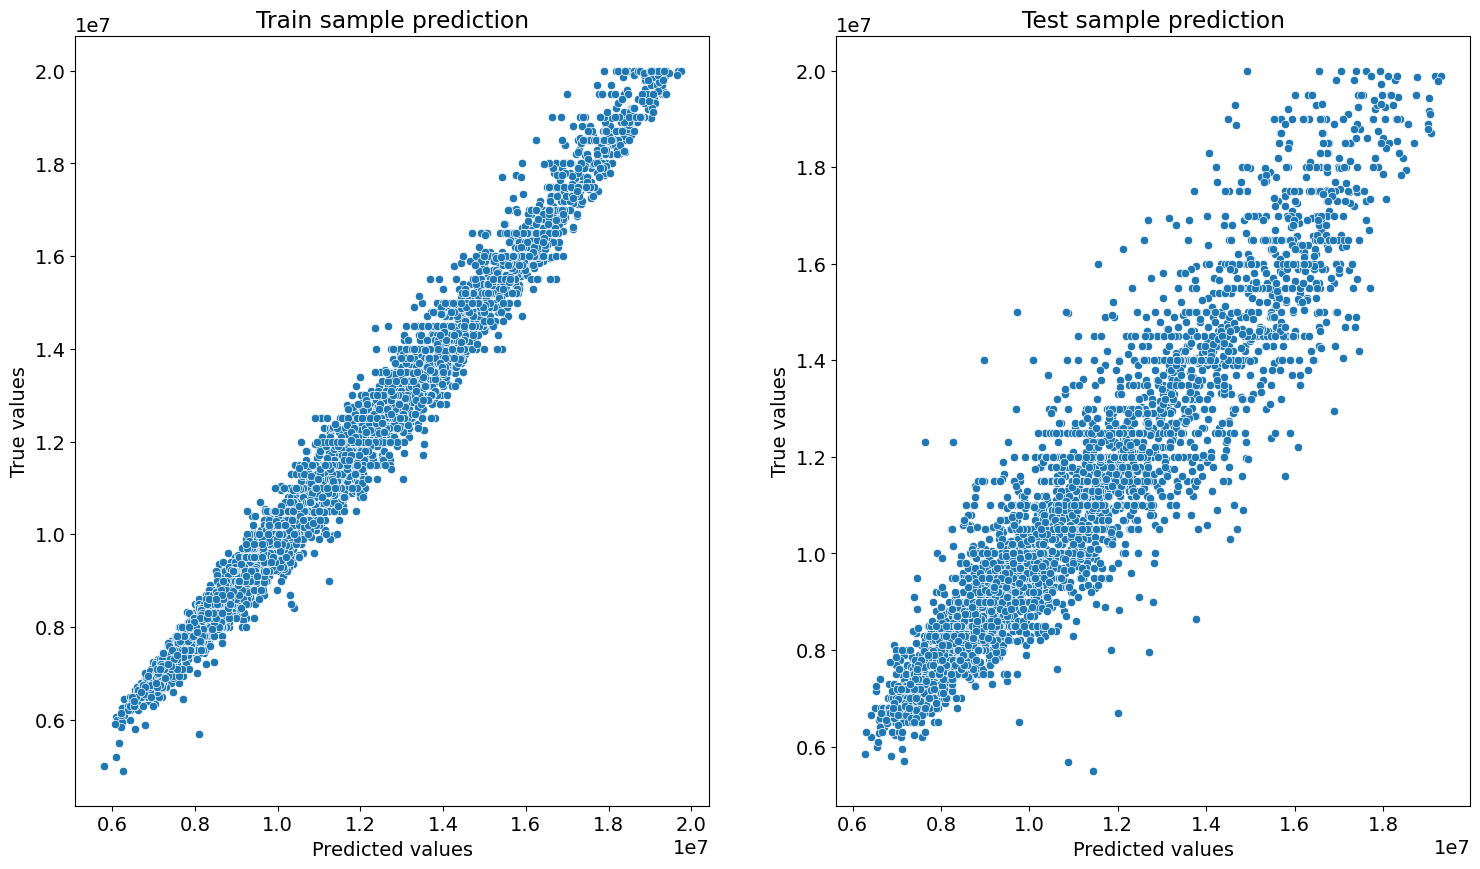

In [920]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [921]:
cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.86662306, 0.85774687, 0.86764127])

In [922]:
cv_score.mean()

0.8640037325576602

In [923]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
11,footage,0.484075
6,subway_dist_to_center,0.226057
2,house_age,0.045844
18,MedPriceByAO,0.043579
13,max_floor,0.035383
4,dist_to_subway,0.028126
0,repair,0.024247
3,closest_subway,0.016869
16,AO,0.014980
8,subway_offers,0.013882
